# Data Analytics Test

Data analytics test ini berisi 2 bagian, teori dan test coding yang masing-masing terdiri dari:

  Teori 

        Konsep Dasar Data Analytics: Tes ini dimaksudkan untuk menguji pemahaman member tentang data analytics.

  Coding Test

        Data preparation test: Tes ini dimaksudkan untuk menguji kemampuan member dalam melakukan ETL data.
        Data visualization test: Tes ini dimaksudkan untuk menguji kemampuan member dalam hal visualisasi data.
        Basic Stats Method test: Tes ini dimaksudkan untuk menguji kemampuan member dalam melakukan modeling data menggunakan statistika dasar

DQLab sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

 

Di awal tahun 2019,   manajer toko tersebut merekrut junior DA untuk membantu  memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko `mendefinisikan` bahwa customer termasuk sudah bukan disebut pelanggan lagi (`churn`) ketika dia sudah `tidak bertransaksi` ke tokonya lagi sampai dengan `6 bulan terakhir` dari update data terakhir yang tersedia.  

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

Berikut tampilan datanya:

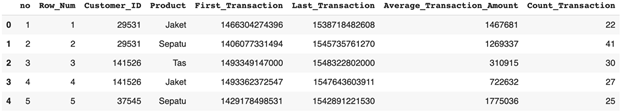

Field yang ada pada data tersebut antara lain:

    No
    Row_Num
    Customer_ID
    Product
    First_Transaction
    Last_Transaction
    Average_Transaction_Amount
    Count_Transaction



  Data preparation test:

        Importing data: Melakukan import data_retail.csv ke python environment.
        Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.

  Data visualization test: 
        
        Mendapatkan insight dari hasil visualisasi yang telah dibuat.
    
  Basic stats method test: 
        
        Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.


# 1 - Data Preparation

## A. Importing Data dan Inspection

Importlah dataset dari https://storage.googleapis.com/dqlab-dataset/data_retail.csv dan kemudian inspeksilah dataset tersebut dengan

    mencetak lima data teratas saja,
    mencetak info dataset.


In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
print('Info dataset:')
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


Tidak ada Null Value

In [ ]:
df.shape

(100000, 8)

## B. Data Cleansing

Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.

In [ ]:
# copy the dataframe
df_copy = df.copy()

**Note** : Docs `pd.to_datetime`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
# Kolom First_Transaction
df_copy['First_Transaction'] = pd.to_datetime(df_copy['First_Transaction'], unit='ms') # unit = 'ns' (default)
# Kolom Last_Transaction
df_copy['Last_Transaction'] = pd.to_datetime(df_copy['Last_Transaction'], unit='ms')
print('Lima data teratas:')
df_copy.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25


In [ ]:
print('Info dataset:')
print(df_copy.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


## C. Menentukan Churn Customers

Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah

    transaksi paling terakhir kapan dilakukan
    klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.

Setelah itu cetak lima data teratas dan informasi dataset.

In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df_copy['Last_Transaction']))

2019-02-01 23:57:57.286000


Jadi terakhir kali transaksi adalah tanggal 2019-02-01 (Year-Month-Date)

Jika `6 bulan terakhir` melakukan transaksi maka `bukan churn`

**Note** : Docs `df.loc[]`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [ ]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
# df.loc[baris, kolom]
df_copy.loc[df_copy['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df_copy.loc[df_copy['Last_Transaction'] > '2018-08-01', 'is_churn'] = False #6 bulan terakhir melakukan transaksi maka bukan churn

print('Lima data teratas:')
df_copy.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False


In [ ]:
print('\nInfo dataset:')
print(df_copy.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB
None


## D. Menghapus kolom yang tidak diperlukan

In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
del df_copy['no']
del df_copy['Row_Num']

In [ ]:
# Cetak lima data teratas
df_copy.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False


In [ ]:
df_clean = df_copy.copy()

# 2 - Data Visualization

## A. Customer acquisition by year

Langkah berikutnya adalah membuat visualisasi data berupa `trend of customer acquisition by year` dengan meggunakan `bar chart`. 

Maka dibuatlah `feature/kolom` tambahan yang merupakan `tahun` dari `First_Transaction` dan `tahun` dari `Last_Transaction` masing-masingnya dengan nama `Year_First_Transaction` dan `Year_Last_Transaction` sebelum melakukan visualisasi.

**Note** : Docs `dt.year`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html

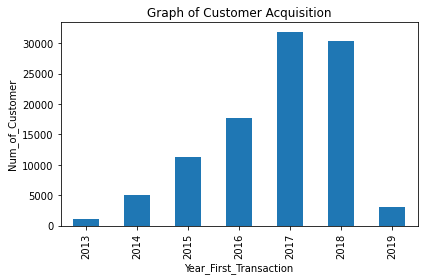

In [ ]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df_clean['Year_First_Transaction'] = df_clean['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df_clean['Year_Last_Transaction'] = df_clean['Last_Transaction'].dt.year

df_year = df_clean.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan grafik, tahun `2017` memiliki `jumlah customer baru terbanyak`, setelah itu `trendnya` semakin `menurun` hingga tahun `2019`

## B. Transaction by year

Visualisasi trend jumlah transaksi per tahunnya.

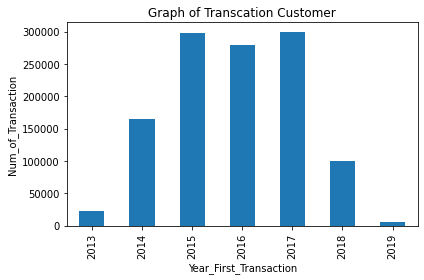

In [ ]:
import matplotlib.pyplot as plt

#plt.clf()
df_year = df_clean.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transcation Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa pada tahun `2015` memiliki `jumlah transaksi` yang `sama` dengan tahun `2017` meskipun `jumlah customer` di tahun tersebut `lebih rendah sekitar 62.5%` dibanding tahun `2017`. Setelah tahun `2017` `jumlah transaksi menurun` hingga sekitar `67%` pada tahun `2018` dan sekitar `97%` pada tahun `2019` `dibanding` tahun 2017.

Poin `menarik` lainnya adalah pada tahun `2018` `jumlah customernya` adalah `tertinggi ke-2` tetapi `jumlah transaksinya` adalah `terendah ke-3`

## C. Average transaction amount by year

Visualisasi tren dari `tahun ke tahun` `rata-rata jumlah transaksi` untuk `tiap-tiap produknya`.

In [ ]:
data = df_clean.groupby(['Product', 'Year_First_Transaction']).mean()
data.head()

Customer_ID  ...  Year_Last_Transaction
Product Year_First_Transaction                 ...                       
Baju    2017                     99973.327529  ...            2017.151741
        2018                    188857.666496  ...            2018.026167
        2019                    281390.361868  ...            2019.000000
Jaket   2014                     30906.745455  ...            2015.827273
        2015                     43482.506832  ...            2016.603106

[5 rows x 4 columns]

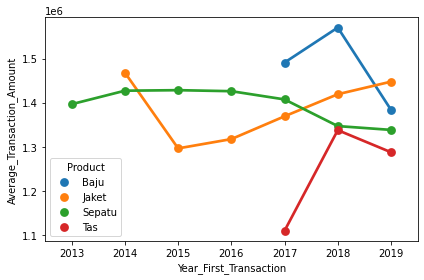

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pointplot(data = df_clean.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), # dataframe rata-rata tiap produk pertahun
              x='Year_First_Transaction', # kolom data x
              y='Average_Transaction_Amount', # kolom data y
              hue='Product') # legend
plt.tight_layout()
plt.show()

Pada tahun 2013 - 2016 produk yang dijual hanya sepatu dan jaket. Dapat dilihat bahwa untuk rata-rata `transaksi` untuk produk `sepatu` cenderung `stabil` di antara 1.3 - 1.4 juta, sedangkan untuk produk `jaket` meskipun sempat `menurun` tajam pada tahun `2015`, akhirnya mengalami `kenaikkan` rata-rata `transaksi` dari tahun `2016 - 2019`.

Pada tahun 2017, baju dan tas ditambahkan kedalam produk penjualan. Terlihat bahwa `baju` sempat `trending` di tahun `2017` dan `2018` dengan menjadi rata-rata transaksi `tertinggi`, meskipun pada tahun `2019` mengalami `penurunan` transaksi. Sedangkan untuk `tas` `kurang diminati` dengan menunjukan rata-rata transaksi `terendah` diantara ketiga produk lainnya.

Poin menarik lainnya adalah rata-rata transaksi untuk produk tas, sepatu dan baju mengalami penurunun pada tahun 2019. 

## D. Proporsi churned customer untuk setiap produk

Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. 

In [ ]:
# Melakukan pivot data dengan pivot_table
df_piv = df_clean.pivot_table(index='is_churn', # index tabel
                              columns='Product', # kolom tabel
                              values='Customer_ID', # kolom yang akan di aggregat
                              aggfunc='count', # aggregat function
                              fill_value=0) # Isi angka 0 ke dalam kolom yang kosong
df_piv.head()

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


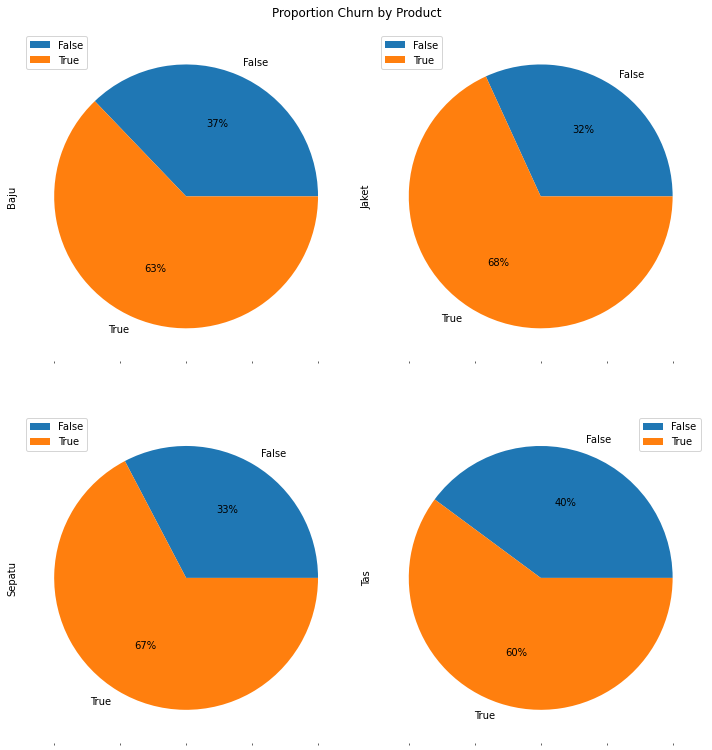

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chartnya
df_piv.plot(subplots=True,
            figsize=(10, 11),
            layout=(2, 2),
            autopct='%1.0f%%',
            title='Proportion Churn by Product',
            kind = 'pie')
plt.tight_layout()
plt.show()

Dari grafik dapat dilihat bahwa customer yang `tidak melakukan transaksi` dengan rentang `6 bulan` cukuplah `tinggi`, dengan range antara `60 - 68%` untuk semua produk.

## E. Distribusi kategorisasi count transaction

Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:


 



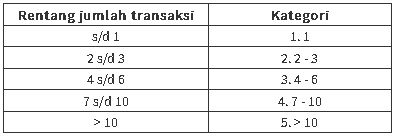

In [ ]:
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 -10'
    else:
        val ='5.> 10'
    return val
# Tambahkan kolom baru
# Objects passed to the function whose index is either the DataFrame's index (axis=0) or the DataFrame's columns(axis=1)
df_clean['Count_Transaction_Group'] = df_clean.apply(func, axis = 1) 
df_clean.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False,2016,2018,5.> 10
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False,2014,2018,5.> 10
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False,2017,2019,5.> 10
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False,2017,2019,5.> 10
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False,2015,2018,5.> 10


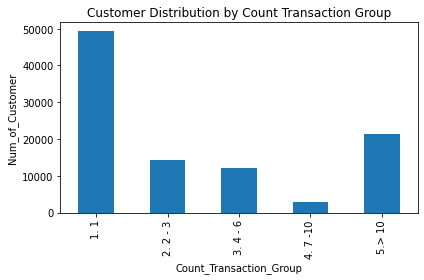

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chartnya
df_year = df_clean.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan grafik, menunjukan bahwa `mayoritas` customer hanya melakukan `1 kali` transaksi

## F. Distribusi kategorisasi average transaction amount

Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:


 



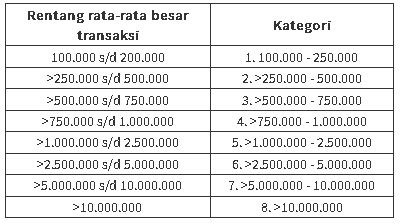

In [ ]:
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. 250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Tambahkan kolom baru
# Objects passed to the function whose index is either the DataFrame's index (axis=0) or the DataFrame's columns(axis=1)
df_clean['Average_Transaction_Amount_Group'] = df_clean.apply(f, axis=1)
df_clean.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,False,2016,2018,5.> 10,5. >1.000.000 - 2.500.000
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,False,2014,2018,5.> 10,5. >1.000.000 - 2.500.000
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,False,2017,2019,5.> 10,2. 250.000 - 500.000
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,False,2017,2019,5.> 10,3. >500.000 - 750.000
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,False,2015,2018,5.> 10,5. >1.000.000 - 2.500.000


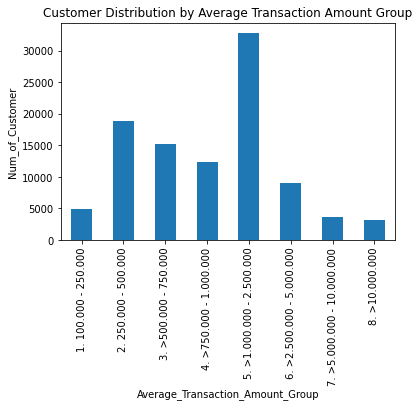

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chartnya
df_year = df_clean.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.show()

Berdasarkan grafik, mayoritas customer bertransaksi dengan nominal antara 1 juta hingga 2.5 juta, diikuti dengan nominal antara 250k hingga 500k

# 3 - Modelling

## A. Feature Columns dan Target

Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X. 

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.

In [ ]:
df_model = df_clean.copy()

In [ ]:
import numpy as np
# Feature column: Year_Diff
df_model['Year_Diff'] = df_model['Year_Last_Transaction'] - df_model['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = np.array(df_model[feature_columns])

In [ ]:
X[0:5]

array([[1467681,      22,       2],
       [1269337,      41,       4],
       [ 310915,      30,       2],
       [ 722632,      27,       2],
       [1775036,      25,       3]], dtype=int64)

### Label Encoder for Target

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Target variable
y = df_model['is_churn']

#ubah data categorical pada kolom is_churn menjadi numeric
LE = LabelEncoder()
y = LE.fit_transform(y) #transform y ke bentuk numeric
y = np.array(y)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

## B. Split X dan y ke dalam bagian training dan testing

Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## C. Train, predict dan evaluate

Langkah selanjutnya akan membuat model menggunakan Logistic Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict model
y_pred=logreg.predict(X_test)

TP: 16666 FN: 3
FP:  8330 TN: 1

       1  0
1  16666  3
0   8330  1


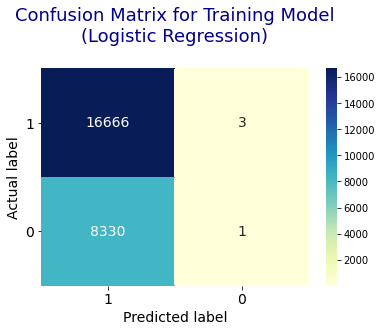

In [ ]:
import seaborn as sns

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=[1, 0], columns=[1, 0])
print(f'TP: {cnf_matrix[0,0]} FN: {cnf_matrix[0,1]}\nFP: {cnf_matrix[1,0]: >5} TN: {cnf_matrix[1,1]}')
print(f'\n{confusion_matrix_df}')
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## D. Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668


In [ ]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80     16669
           0       0.25      0.00      0.00      8331

    accuracy                           0.67     25000
   macro avg       0.46      0.50      0.40     25000
weighted avg       0.53      0.67      0.53     25000



Berdasarkan `Classification Report` diatas, `model` ini `baik` untuk `mendeteksi` adanya `churn` (67% precision and 100% recall) tetapi `buruk` untuk `mendeteksi` `non-churn`. Sehingga perlu `diuji` dengan `model lain`.